In [995]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

Создадим распределение:

In [996]:
class X_gen(sps.rv_continuous):
    def _pdf(self, x):
        return np.exp(-x)

X = X_gen(a = 0)

In [997]:
data = X.rvs(size=25)

In [998]:
print(f"мода: {sps.mode(data)}")
print(f"медиана: {np.median(data)}")
print(f"размах: {np.max(data) - np.min(data)}")
print(f"коэффициент асимметрии: {sps.skew(data)}")

мода: ModeResult(mode=np.float64(0.09319468657195572), count=np.int64(1))
медиана: 0.8877591513826585
размах: 3.8716077298676526
коэффициент асимметрии: 1.1472715410095695


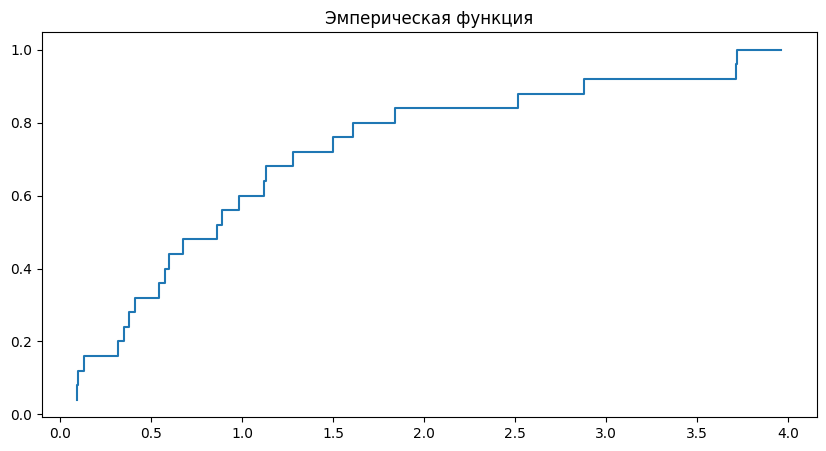

In [999]:
#Эмперическая функция
arr = np.sort(data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Эмперическая функция")
ax.step(arr, np.arange(1, len(arr) + 1) / len(arr))

(array([0.68188726, 0.37193851, 0.18596925, 0.06198975, 0.06198975,
        0.18596925]),
 array([0.09319469, 0.73846264, 1.3837306 , 2.02899855, 2.67426651,
        3.31953446, 3.96480242]),
 <BarContainer object of 6 artists>)

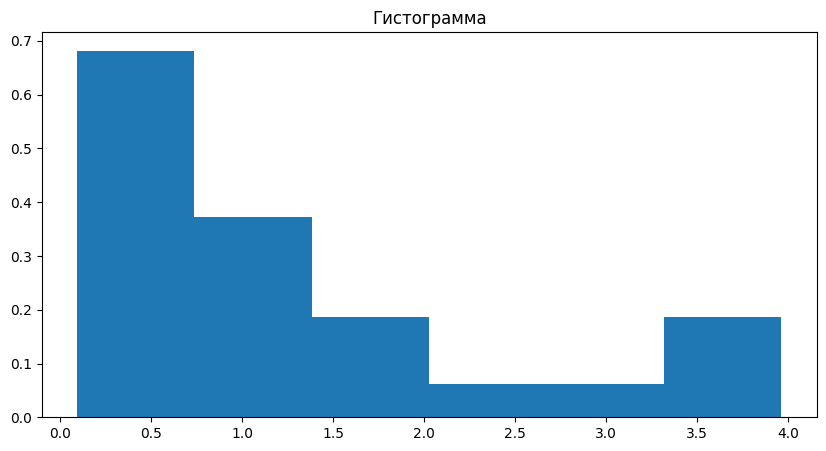

In [1000]:
#Гистограмма
arr = np.sort(data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Гистограмма")
ax.hist(arr, bins='auto', density=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a8a55c5c4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a8a55c5ca70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a8a55c5c350>],
 'medians': [<matplotlib.lines.Line2D at 0x7a8a55c5d070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a8a55d496d0>],
 'means': []}

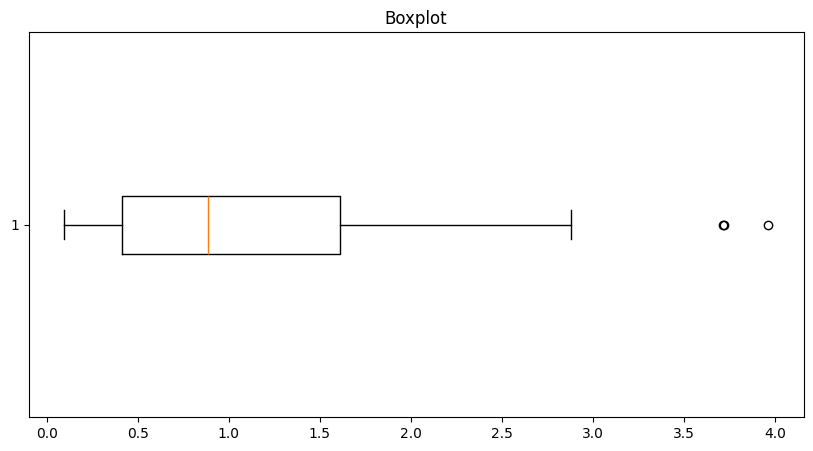

In [1001]:
#Boxplot
arr = np.sort(data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Boxplot")
ax.boxplot(arr, vert=False)

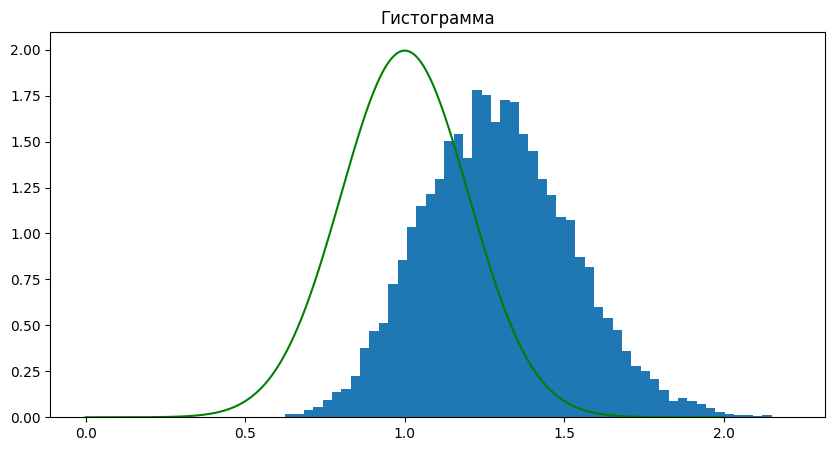

In [ ]:
#сравнение оценок плотности распределения среднего арифметического, полученных с помощью ЦПТ и bootstrap
bootstrap_means = sps.bootstrap((data, ), statistic=np.mean)

arr = np.sort(bootstrap_means.bootstrap_distribution)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Гистограмма")
ax.hist(arr, bins='auto', density=True)


#коэффициенты распределения полученные с помощью ЦПТ
sigma = 1 #дисперсия

mat_waiting = 1 #математическое ожидания

x = np.linspace(mat_waiting - sigma, mat_waiting + sigma, 1000)
ax.plot(x, sps.norm.pdf(x, 1, 0.2), color='green')



(array([0.0020775 , 0.        , 0.0020775 , 0.        , 0.0020775 ,
        0.01246498, 0.01661998, 0.02077497, 0.02700747, 0.02700747,
        0.06024742, 0.06232492, 0.10802986, 0.16827728, 0.13295983,
        0.2347572 , 0.3074696 , 0.42173195, 0.45081692, 0.57131176,
        0.65233416, 0.76451901, 0.8476189 , 0.94526128, 0.95564876,
        0.97226874, 1.08860859, 1.0782211 , 1.07198861, 1.0013537 ,
        0.94318378, 0.89124635, 0.81853394, 0.81022395, 0.6938841 ,
        0.60662921, 0.61078421, 0.51314184, 0.44250693, 0.41549946,
        0.30123711, 0.29084962, 0.2326797 , 0.21813722, 0.16827728,
        0.14750231, 0.1578898 , 0.09764237, 0.05193743, 0.07063491,
        0.04570494, 0.04362744, 0.04362744, 0.02492997, 0.02908496,
        0.01661998, 0.01246498, 0.01246498, 0.01454248, 0.00830999,
        0.00623249, 0.0020775 , 0.0020775 , 0.01038749, 0.00623249,
        0.0020775 , 0.0020775 , 0.        , 0.        , 0.        ,
        0.0020775 ]),
 array([-0.24590344, -0.19

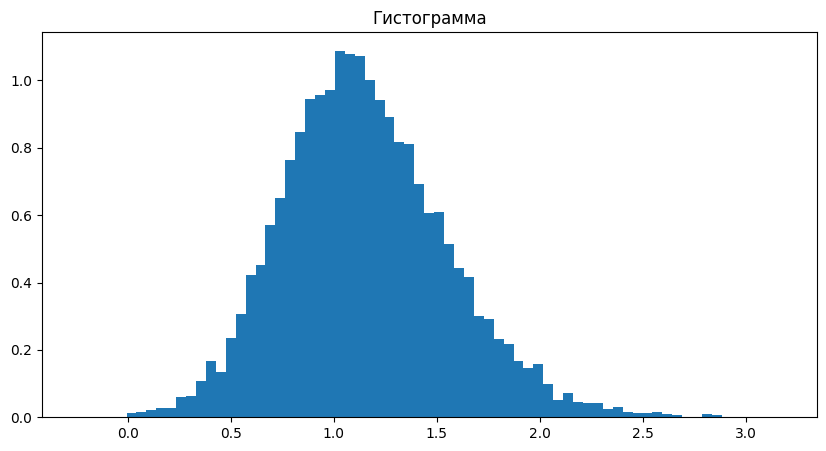

In [1003]:
#бутстраповская оценка коэффициента асимметрии

bootstrap_skew = sps.bootstrap((data, ), statistic=sps.skew)

arr = np.sort(bootstrap_skew.bootstrap_distribution)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Гистограмма")
ax.hist(arr, bins='auto', density=True)


In [1004]:
#вероятность того, что коэффициент асимметрии меньше единицы

count = 0

for i in bootstrap_skew.bootstrap_distribution:
    count += int(i < 1)

print(count / len(bootstrap_skew.bootstrap_distribution))

0.36853685368536854


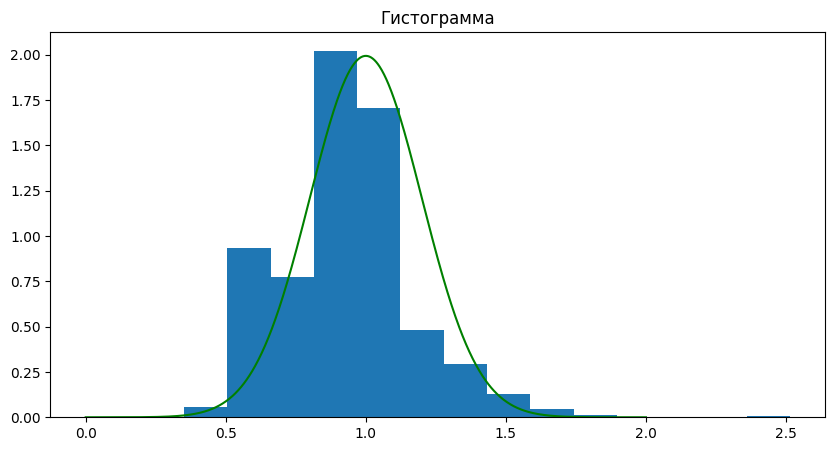

In [ ]:
#сравнение плотности медианы выборки с бутстраповской оценкой

bootstrap_median = sps.bootstrap((data, ), statistic=np.median)

arr = np.sort(bootstrap_median.bootstrap_distribution)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Гистограмма")
ax.hist(arr, bins=int(1 + np.log2(len(arr))), density=True)

#плотность распределения медианы получена из уравнения F(x) = 0.5
sigma = 1 #дисперсия

mat_waiting = 1 #математическое ожидания

x = np.linspace(mat_waiting - sigma, mat_waiting + sigma, 1000)
ax.plot(x, sps.norm.pdf(x, 1, 0.2), color='green')
